Aluno: Fernanda Midori Abukawa

nº USP: 9797594

Disciplina: IBI5031 - 2º semestre de 2020

Prof: Marcelo da Silva Reis

Lista 4

utilizados: python3, anaconda3, jupyter notebooks v6.1, macOS, sklearn v0.23

In [105]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.svm import SVC 

In [106]:
data = pd.read_csv('parkinsons.data.csv', sep = ',')

#tirando a primeira coluna com os nomes dos pacientes
data.drop('name',axis = 1, inplace = True)

y = data['status'].copy()
X = data.drop('status',axis = 1).copy()

#numero de N características 
N = len(X)
n_carac = len(data.columns)
print('são %d pontos e %d características' % (N, n_carac))

#normalizar os dados de input 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print('X normalizado')

são 195 pontos e 23 características
X normalizado


## Exercício 1

### Clustering por Kmeans

Foi utilizado o método de clustering por kmeans e o resultado do clustering foi comparado com o rótulo real. Como o método nomeia os dois clusters por 0 e 1, foi comparado o resultado do clustering com os clusters sendo 0 e 1 e com os mesmos sendo 1 e 0. Dessa forma a escolha da melhor representação dos clusters como sendo a classificação final dos rótulos originais foi como o primeiro cluster sendo 1 e o segundo, 0. 

In [107]:
#kmeans 
cluster = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, verbose=0
                ,random_state=42, algorithm='full')

kmeans = cluster.fit(X_scaled)
label_kmeans = kmeans.labels_
#print(label_kmeans)

#para computar o número de rótulos preditos corretos com os rótulos sem modificação
correct_kmeans = 0
for i in range(len(y)):
    if y[i] == label_kmeans[i]:
        correct_kmeans += 1

print('o clustering por kmeans acertou %d rótulos' % correct_kmeans)

o clustering por kmeans acertou 88 rótulos


In [108]:
#trocando o rótulo do cluster de 0 para 1 e 1 para 0 
label_kmeans_ch = []
for i in range(len(label_kmeans)):
    if label_kmeans[i] == 1:
        label_kmeans_ch.append(0)
    elif label_kmeans[i] == 0:
        label_kmeans_ch.append(1)
        
#para computar o número de rótulos preditos corretos 
correct_kmeans = 0
for i in range(len(y)):
    if y[i] == label_kmeans_ch[i]:
        correct_kmeans += 1

print('o clustering por kmeans modificado acertou %d rótulos' % correct_kmeans)

o clustering por kmeans modificado acertou 107 rótulos


### Melhor modelo de SVM da lista 3

Esse modelo obteve acurácia de 1.0

In [133]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#modificando os rótulos de y e do resultado do kmeans para comparação
y = y.replace(to_replace = 0, value = -1)

label_kmeans_mod = []
for i in range(len(label_kmeans)):
    if label_kmeans[i] == 1:
        label_kmeans_mod.append(-1)
    else:
        label_kmeans_mod.append(1)

#modelo de svm kernel polinomial da lista 3 
clf_svm_poly = SVC(kernel = 'poly', C = 10, coef0 = 5, degree = 4, gamma = 0.01)
clf_svm_poly.fit(X_scaled, y)
label_svm = clf_svm_poly.predict(X_scaled)

cm = confusion_matrix(y, label_kmeans_mod)
#print(cm)
print('Acurácia: %.3f' % accuracy_score(y,label_kmeans_mod))
#print(label_svm)

Acurácia: 0.549


#### Comparação entre a classificação pelo SVM e pelo cluster kmeans

| Modelo|Verdadeiro positivo|Falso positivo|Verdadeiro negativo|Falso negativo|Acurácia|
|-------|-------------------|--------------|-------------------|--------------|--------|
|SVM - polinomial | 147 | 0 | 48 | 0 | 1.0 |
|K-means| 107 | 48 | 0 | 40 | 0.549 |



Nesse caso, o método de aprendizado supervisionado SVM se mostrou muito superior ao método de agrupamento por kmeans. 

## Exercício 2

No Agrupamento hierárquico foram utilizados as diferentes linkages (ward, complete, average e single) com a métrica de distância euclidiana para fazer as comparações.

In [3]:
#função de plotar o dendograma 
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

In [96]:
y = data['status'].copy()
list_0 = []
list_1 = []
for i in range(len(y)):
    if y[i] == 0:
        list_0.append(i)
    else:
        list_1.append(i)
print('são %d pontos 0' % len(list_0))
print('são %d pontos 1' %len(list_1))

são 48 pontos 0
são 147 pontos 1


https://stackoverflow.com/questions/57638604/extract-path-from-root-to-leaf-in-sklearns-agglomerative-clustering

Foram utilizadas funções do stackoverflow para obter a lista dos pontos correspondentes de cada nodo em ordem de separação. Foram definidos como cluster 0 e 1 as duas separações dos pontos no dendograma, apenas como forma de comparar as quantidades de pontos em cada "lado" do dendograma. 

### Linkage Ward

In [115]:
def find_ancestor(target):
    for ind,pair in enumerate(model.children_):
        if target in pair:
            return [target]+find_ancestor(N+ind)
    return [ind+N]

mem = {}
def find_descendent(node):
    global mem
    if node in mem: return mem[node]
    if node<N: return [node]
    pair = model.children_[node-N]
    mem[node] = find_descendent(pair[0])+find_descendent(pair[1])
    return mem[node]

def find_children(n):
    ans = []
    for a in find_ancestor(n)[::-1]:
        ans.append(find_descendent(a))
    return ans[1] 

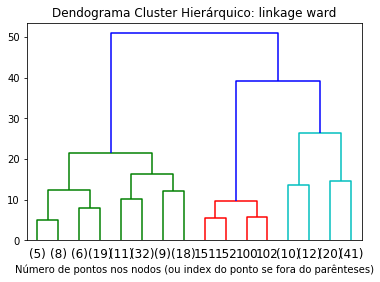

pontos do cluster 0: 87
pontos do cluster 1: 108


In [114]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, 
                                affinity='euclidean', linkage='ward').fit(X_scaled)

plt.title('Dendograma Cluster Hierárquico: linkage ward')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Número de pontos nos nodos (ou index do ponto se fora do parênteses)")
plt.show()

cluster_0 = find_children(0)
for i in range(1,196):
    if find_children(i) != cluster_0:
        cluster_1 = find_children(i)
        break
        
c0 = cluster_0
c1 = cluster_1
print('pontos do cluster 0:', len(cluster_0))
print('pontos do cluster 1:', len(cluster_1))

### Linkage Complete

In [116]:
def find_ancestor(target):
    for ind,pair in enumerate(model.children_):
        if target in pair:
            return [target]+find_ancestor(N+ind)
    return [ind+N]

mem = {}
def find_descendent(node):
    global mem
    if node in mem: return mem[node]
    if node<N: return [node]
    pair = model.children_[node-N]
    mem[node] = find_descendent(pair[0])+find_descendent(pair[1])
    return mem[node]

def find_children(n):
    ans = []
    for a in find_ancestor(n)[::-1]:
        ans.append(find_descendent(a))
    return ans[1] 

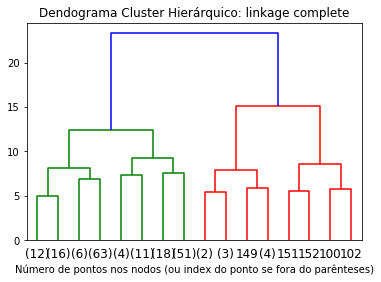

pontos do cluster 0: 181
pontos do cluster 1: 14


In [117]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, 
                                affinity='euclidean', linkage='complete').fit(X_scaled)

plt.title('Dendograma Cluster Hierárquico: linkage complete')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Número de pontos nos nodos (ou index do ponto se fora do parênteses)")
plt.show()

cluster_0 = find_children(0)
for i in range(1,196):
    if find_children(i) != cluster_0:
        cluster_1 = find_children(i)
        break 
print('pontos do cluster 0:', len(cluster_0))
print('pontos do cluster 1:', len(cluster_1) )

### Linkage Average

In [118]:
def find_ancestor(target):
    for ind,pair in enumerate(model.children_):
        if target in pair:
            return [target]+find_ancestor(N+ind)
    return [ind+N]

mem = {}
def find_descendent(node):
    global mem
    if node in mem: return mem[node]
    if node<N: return [node]
    pair = model.children_[node-N]
    mem[node] = find_descendent(pair[0])+find_descendent(pair[1])
    return mem[node]

def find_children(n):
    ans = []
    for a in find_ancestor(n)[::-1]:
        ans.append(find_descendent(a))
    return ans[1] 

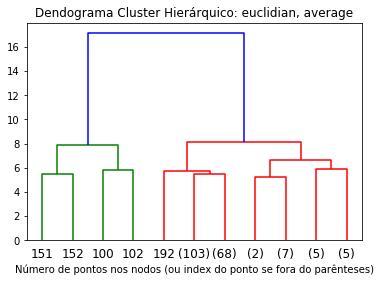

pontos do cluster 0: 191
pontos do cluster 1: 4


In [119]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, 
                                affinity='euclidean', linkage='average').fit(X_scaled)

plt.title('Dendograma Cluster Hierárquico: euclidian, average')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Número de pontos nos nodos (ou index do ponto se fora do parênteses)")
plt.show()

cluster_0 = find_children(0)
for i in range(1,196):
    if find_children(i) != cluster_0:
        cluster_1 = find_children(i)
        break 
        
print('pontos do cluster 0:', len(cluster_0))
print('pontos do cluster 1:', len(cluster_1))

### Linkage Single 

In [120]:
def find_ancestor(target):
    for ind,pair in enumerate(model.children_):
        if target in pair:
            return [target]+find_ancestor(N+ind)
    return [ind+N]

mem = {}
def find_descendent(node):
    global mem
    if node in mem: return mem[node]
    if node<N: return [node]
    pair = model.children_[node-N]
    mem[node] = find_descendent(pair[0])+find_descendent(pair[1])
    return mem[node]

def find_children(n):
    ans = []
    for a in find_ancestor(n)[::-1]:
        ans.append(find_descendent(a))
    return ans[1] 

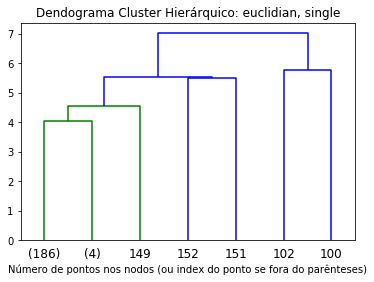

pontos do cluster 0: 193
pontos do cluster 1: 2


In [121]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, 
                                affinity='euclidean', linkage='single').fit(X_scaled)

plt.title('Dendograma Cluster Hierárquico: euclidian, single')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Número de pontos nos nodos (ou index do ponto se fora do parênteses)")
plt.show()

cluster_0 = find_children(0)
for i in range(1,196):
    if find_children(i) != cluster_0:
        cluster_1 = find_children(i)
        break 
        
print('pontos do cluster 0:', len(cluster_0))
print('pontos do cluster 1:', len(cluster_1) )

### Melhor resultado do Clustering Hierárquico 

| Linkage|nº de pontos no cluster 0|nº de pontos no cluster 1|
|--------|-------------------------|-------------------------|
|Ward | 87 | 108 | 
|Complete | 181 | 14 | 
|Average| 191 | 4 | 
|Single | 193 | 4 | 
|Rótulo real | 48 | 147 |




O que melhor se aproximou da proporção dos rótulos reais foi o método de linkage Ward.

In [132]:
correto_0 = 0 
for i in range(len(c0)):
    for j in range(len(list_0)):
        if c0[i] == list_0[j]:
            correto_0 += 1

correto_1 = 0 
for i in range(len(c1)):
    for j in range(len(list_1)):
        if c1[i] == list_1[j]:
            correto_1 += 1
print('foram %d corretos para o rótulo 0 e %d corretos para o rótulo 1' % (correto_0, correto_1))
        

foram 1 corretos para o rótulo 0 e 61 corretos para o rótulo 1


Os resultados mostram que nesse caso ao utilizar métodos não supervisionados como forma de classificar os dados, não se obteve muito êxito. 